In [1]:
import numpy as np
import sympy as sp

from functools import reduce
from typing import Callable, Iterable

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Onbayev Baurzhan (15 variant)

In [2]:
def f(x):
    return 2 * np.log(x + 5 ** (1 / 2)) * np.sinh(x)


a = 1
b = 3

x_1 = 1.24
x_2 = 1.97
x_3 = 2.54

x_collection = [x_1, x_2, x_3]


# task 1

In [3]:
# polynom - будем хранить коэффициенты слева направо по убыванию степени икса


class task_1:
    def __init__(self, x_collection: Iterable, f: Callable) -> None:
        self.x_collection = x_collection
        self.func = f
        self.y_collection = [f(x) for x in x_collection]

    @staticmethod
    def pol_prod(a, b):
        """
        params:
            a, b - polynoms coefficients
        returns:
            c - a * b polynom coefficients
        """
        size_a = len(a)
        size_b = len(b)
        size_c = size_a + size_b - 1
        c = [0.0] * size_c
        for i in range(size_a):
            for j in range(size_b):
                c[i + j] += a[i] * b[j]
        return c

    @staticmethod
    def pol_sum(a, b):
        """
        params:
            a, b - polynoms coefficients
        returns:
            c - a + b polynom coefficients
        """
        size_a = len(a)
        size_b = len(b)
        max_len = max(size_a, size_b)
        min_len = min(size_a, size_b)
        size_c = max_len
        c = [0.0] * size_c

        if size_a == size_b:
            for i in range(size_c):
                c[i] = a[i] + b[i]
            return c

        arr = a if size_a < size_b else b
        c_ = [0.0] * (max_len - min_len) + [el for el in arr]
        for i in range(size_c):
            x = a[i] if size_a > size_b else b[i]
            c[i] = c_[i] + x
        return c

    @staticmethod
    def take_derivative(w):
        """
        params:
            w - polynom coefficients (от макс степени к мин степени)
        returns:
            w_ - w polynom-deriviate coefficients (от макс степени к мин степени)
        """
        w_ = np.zeros_like(w)
        size = len(w)
        for i in range(1, size):
            w_[i] = w[i - 1] * (size - i)
        return w_

    @staticmethod
    def f(w, x):
        """
        params:
            w: iterable object - коэффициенты полинома от максимальной степени к минимальной
            x: some number - x value
        returns:
            polynom-function value of x
        """
        size = len(w)
        return sum([w[i] * x ** (size - i) for i in range(size)])

    def count_l_k(self, k: int):
        w = reduce(task_1.pol_prod, [[1, -x] for x in self.x_collection])
        w_d = task_1.take_derivative(w)
        znam = task_1.pol_prod(w_d, [1, -self.x_collection[k]])
        return w, znam

    def L(self, x):
        if not hasattr(self, "fund_pol_collection"):
            self.fund_pol_collection = [
                self.count_l_k(k) for k in range(len(self.x_collection))
            ]
        s = 0
        for i in range(len(self.x_collection)):
            s += (
                self.y_collection[i]
                * task_1.f(self.fund_pol_collection[i][0], x)
                / task_1.f(self.fund_pol_collection[i][1], self.x_collection[i])
            )
        return s


In [4]:
c = [1, 2, 3]
d = [4, 5, 6, 5]

task_1.pol_prod(d, c), task_1.pol_sum(d, c)


([4.0, 13.0, 28.0, 32.0, 28.0, 15.0], [4.0, 6, 8, 8])

In [5]:
l = task_1(x_collection, f)
l.x_collection, l.y_collection


([1.24, 1.97, 2.54],
 [3.9448106021193134, 10.100545557435815, 19.70283991653756])

In [6]:
a, b, x_collection, [f(x) for x in x_collection], [l.L(x) for x in x_collection]


(1,
 3,
 [1.24, 1.97, 2.54],
 [3.9448106021193134, 10.100545557435815, 19.70283991653756],
 [-0.5086716752128538, 0.0, -2.0346867008514153])

In [7]:
for x in x_collection:
    print(f(x), l.L(x))


3.9448106021193134 -0.5086716752128538
10.100545557435815 0.0
19.70283991653756 -2.0346867008514153


In [8]:
def plot_graphic(fs, a, b, n):
    f, ax = plt.subplots(1, 1)
    f.set_size_inches(16, 9)
    xs = np.linspace(a, b, n)
    for f in fs:
        ys = np.array([f(x) for x in xs])
        sns.lineplot(x=xs, y=ys, ax=ax)
    plt.show()


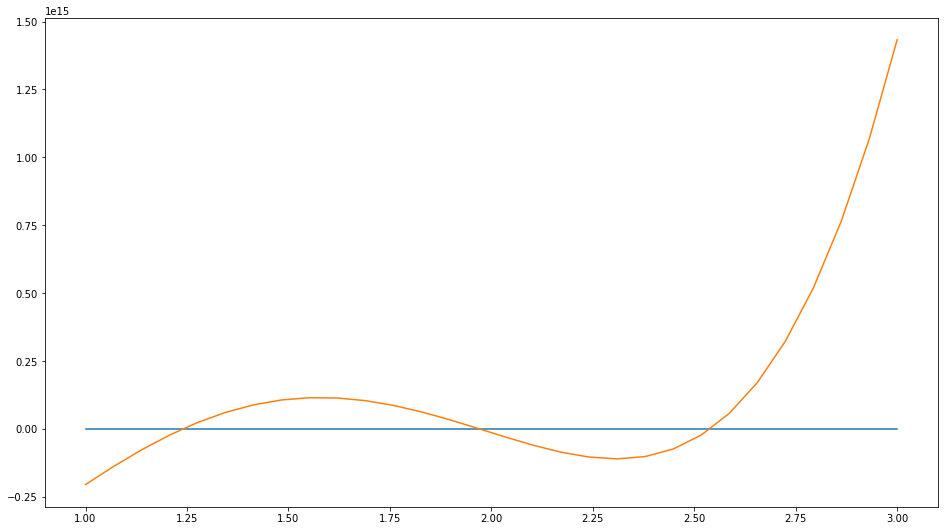

In [9]:
plot_graphic([f, l.L], a, b, 30)
